The difference with v1 is that in this one, I am trying to keep the POD mode the same for all xis.

In [1]:
# importing stuff:
import numpy as np
import cte_eq
import sys
sys.path.append('./..')
import ProcessFunctions
from ProcessFunctions import find_Aisv2_onlyv
import matplotlib.pyplot as plt
from scipy.stats import shapiro



In [2]:
# load the simulation data that is recorded in RunForward2D.ipynb
# the data is saved in this directory:
drs=0.012
T_final=10500
Nx=4096
N_m_load=20
# T_filter=8000 # taking T_filter large for now to see if the my idea with earthquakes works well.
# apply POD in a loop:
# downsampleratio=1 # not downsampling anything
# N_snapshots=0 # is not going to be used in the function
# specify_N_snapshots=False
# direct='/central/groups/astuart/hkaveh/Data/LearnROM/transfer/2DSim_MainSimulation_Tf'+str(T_final)+"Nx="+str(cte_eq.Nxout)+"Nt="+str(cte_eq.Ntout)+'drs'+str(drs)+".npz"
# data=np.load(direct)
# v=data["v"]
# theta=data["theta"]
# t=data["t"]

In [3]:
data_dir='/central/groups/astuart/hkaveh/Data/LearnROM/transfer/MainSimulation2D_Tf'+str(T_final)+"Nt="+str(cte_eq.Ntout)+"Nx="+str(cte_eq.Nxout)+'PODonlyonV'+'drs'+str(drs)+".npz"
PODmodes=np.load(data_dir)
U_v=PODmodes['U']
S_v=PODmodes['S']
# VT_v=PODmodes['VT']
q_bar_v=PODmodes['q_bar']

In [5]:
data_dir='/central/groups/astuart/hkaveh/Data/LearnROM/transfer/MainSimulation2D_Tf'+str(T_final)+"Nt="+str(cte_eq.Ntout)+"Nx="+str(cte_eq.Nxout)+'PODonlyontheta'+'drs'+str(drs)+".npz"

PODmodes=np.load(data_dir)
U_theta=PODmodes['U']
S_theta=PODmodes['S']
# VT_theta=PODmodes['VT']
q_bar_theta=PODmodes['q_bar']

In [6]:
# loading test data:
T_final_run = 350 # each initial condition is simulated for 250 years
coeff=1 # How the inital conditions are from the chaotic attractor
number=100
data_dir='/central/groups/astuart/hkaveh/Data/LearnROM/transfer/SampleSimulation_Tf_2D'+str(T_final_run)+"Nt="+str(cte_eq.Ntout)+"N_m"+str(30)+"coeff"+str(coeff)+"number"+str(number)+".npz"
data_smaple=np.load(data_dir)
V_ox_test=data_smaple['array1']
theta_ox_test=data_smaple['array2']
t_ox_test=data_smaple['array3']

# V_ox_test=np.log10(V_ox_test)
# theta_ox_test=np.log10(theta_ox_test)

In [7]:
V_ox_test.shape

(1250, 4096)

In [8]:
xis=np.logspace(-6,6,12)
print(xis)

[1.00000000e-06 1.23284674e-05 1.51991108e-04 1.87381742e-03
 2.31012970e-02 2.84803587e-01 3.51119173e+00 4.32876128e+01
 5.33669923e+02 6.57933225e+03 8.11130831e+04 1.00000000e+06]


In [9]:
# resmaple v based on a probability p
score=np.zeros_like(xis)
p_shapiro=np.zeros((1,N_m_load))
for index_xi,xi in enumerate(xis):

    print('xi is ', xi)
    
    # check normality on the test data:
    # find p
    p_test=np.tanh(xi*np.max(V_ox_test,axis=1))
    Nt_test=p_test.shape[0]
    keep_mask_test=np.random.rand(Nt_test) > p_test
    t_resampled_test = t_ox_test[keep_mask_test]
    v_resampled_test = V_ox_test[keep_mask_test]
    theta_resampled_test=theta_ox_test[keep_mask_test]

    # apply log10 to v
    v_log10_test_filterd=np.log10(v_resampled_test)
    A_v,P_v=find_Aisv2_onlyv(U_v,V_ox_test,q_bar_v,N_m_load) # you dont need P in general, but I need it to check if I do everything correctly
    y=A_v[1:]-A_v[:-1]
    A_v_filtered=A_v[keep_mask_test]
    y_filtered=y[keep_mask_test[:-1]]
    for i in range(N_m_load):
        stat, p_shapiro[0,i] = shapiro(A_v_filtered[:, i])
        print(f"PC {i+1}: Shapiro p-value = {p_shapiro[0,i]}")
    score[index_xi] = np.mean(np.log10(p_shapiro))

xi is  1e-06
PC 1: Shapiro p-value = 1.146384196913943e-38
PC 2: Shapiro p-value = 6.222983436855909e-36
PC 3: Shapiro p-value = 7.201196057366786e-35
PC 4: Shapiro p-value = 2.675327158378193e-26
PC 5: Shapiro p-value = 2.8408380764791475e-20
PC 6: Shapiro p-value = 4.11195769072894e-28
PC 7: Shapiro p-value = 4.366687035373881e-32
PC 8: Shapiro p-value = 5.1109478373485024e-26
PC 9: Shapiro p-value = 7.546568215168262e-14
PC 10: Shapiro p-value = 2.2661515294713035e-34
PC 11: Shapiro p-value = 1.380990881623704e-22
PC 12: Shapiro p-value = 1.1856508342397015e-13
PC 13: Shapiro p-value = 6.2274318824529345e-28
PC 14: Shapiro p-value = 1.1311071045458805e-23
PC 15: Shapiro p-value = 5.689516600937991e-16
PC 16: Shapiro p-value = 6.272100818247458e-29
PC 17: Shapiro p-value = 6.204708316521596e-28
PC 18: Shapiro p-value = 3.08325563345003e-20
PC 19: Shapiro p-value = 4.4030968107677815e-14
PC 20: Shapiro p-value = 1.3787704590565603e-22
xi is  1.2328467394420658e-05
PC 1: Shapiro p-valu

/central/groups/astuart/hkaveh/soft/miniconda3/envs/learnmodel/lib/python3.7/site-packages/scipy/stats/morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [10]:
p_shapiro[0,2
]

1.0

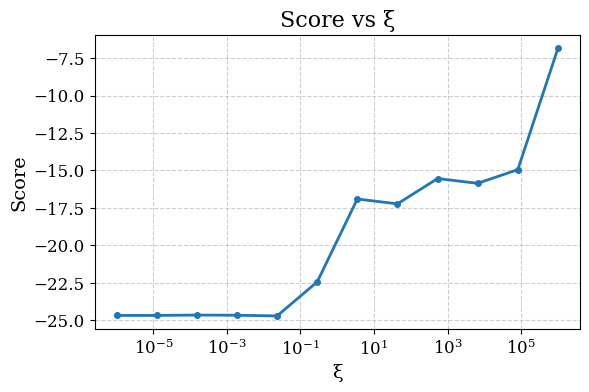

In [11]:

plt.figure(figsize=(6, 4))  # Set figure size

# Plot
plt.plot(xis, score, linewidth=2, marker='o', markersize=4)

# Labels and title
plt.xlabel('ξ', fontsize=14, fontname='DejaVu Serif')
plt.ylabel('Score', fontsize=14, fontname='DejaVu Serif')
plt.title('Score vs ξ', fontsize=16, fontname='DejaVu Serif')

# Tick parameters
plt.xticks(fontsize=12, fontname='DejaVu Serif')
plt.yticks(fontsize=12, fontname='DejaVu Serif')

# Grid and layout
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.xscale("log")
plt.show()